In [32]:
import pandas as pd

from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

c:\Users\WINDOWS\AppData\Local\Programs\Python\Python310\lib\site-packages\plotly_resampler\aggregation\aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


In [33]:
d='2015-01-08 22:44:09' 
date=pd.to_datetime(d).date()
print(date)

2015-01-08


In [38]:
df = pd.read_csv("datasets/energy_dataset.csv")
df = df.rename(columns={'time': 'ds', 'price actual': 'y'})
columns_to_keep = ['ds', 'y']
df = df[columns_to_keep]
df

,ds,y
0,2015-01-01 00:00:00+01:00,65.41
1,2015-01-01 01:00:00+01:00,64.92
2,2015-01-01 02:00:00+01:00,64.48
3,2015-01-01 03:00:00+01:00,59.32
4,2015-01-01 04:00:00+01:00,56.04
...,...,...
35059,2018-12-31 19:00:00+01:00,77.02
35060,2018-12-31 20:00:00+01:00,76.16
35061,2018-12-31 21:00:00+01:00,74.30
35062,2018-12-31 22:00:00+01:00,69.89


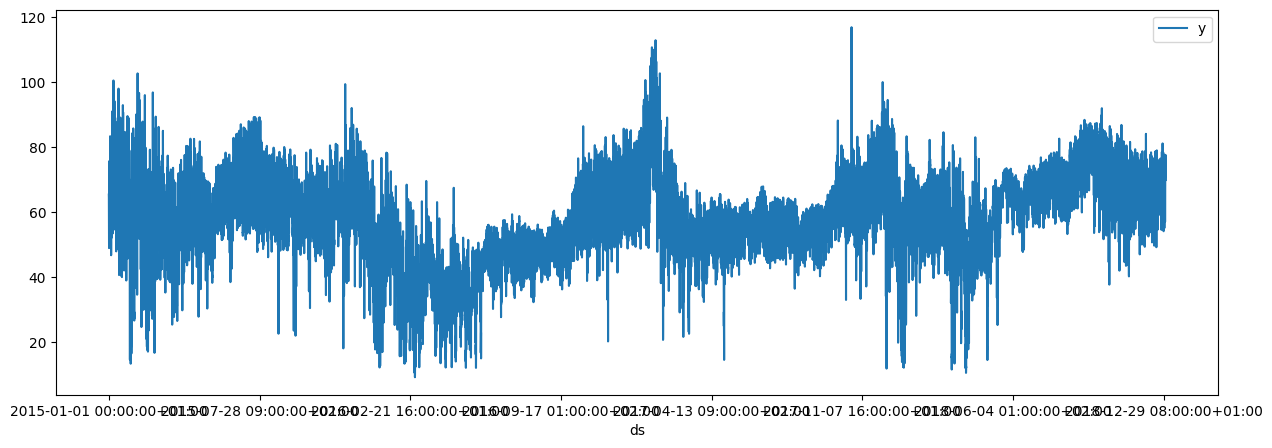

In [39]:
plt = df.plot(x="ds", y="y", figsize=(15, 5))

In [41]:
m = NeuralProphet(epochs=5)
m.set_plotting_backend("matplotlib")
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/263 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 548it [00:00, ?it/s]

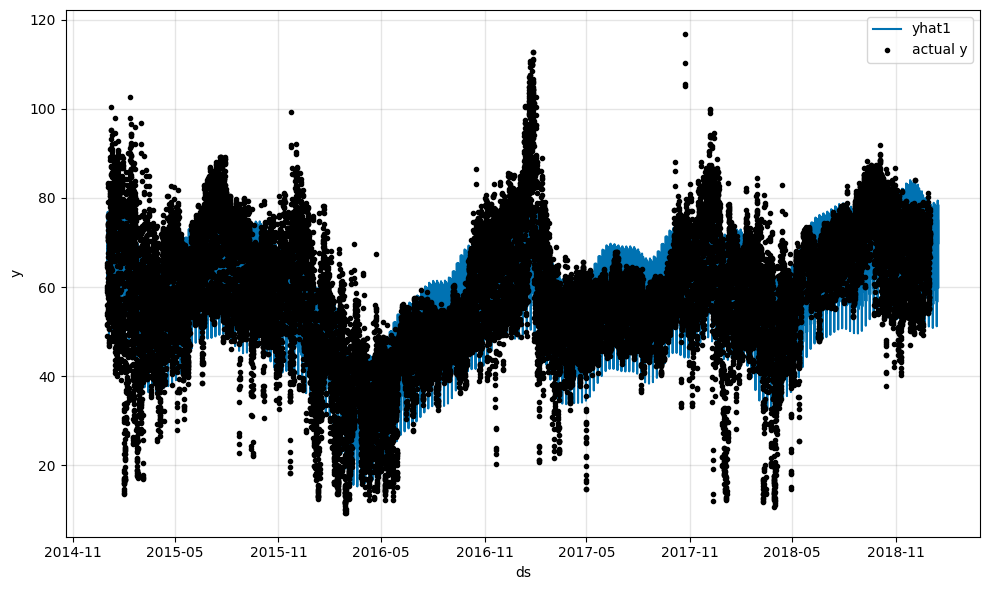

In [42]:
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=365)

forecast = m.predict(df_future)
m.plot(forecast)

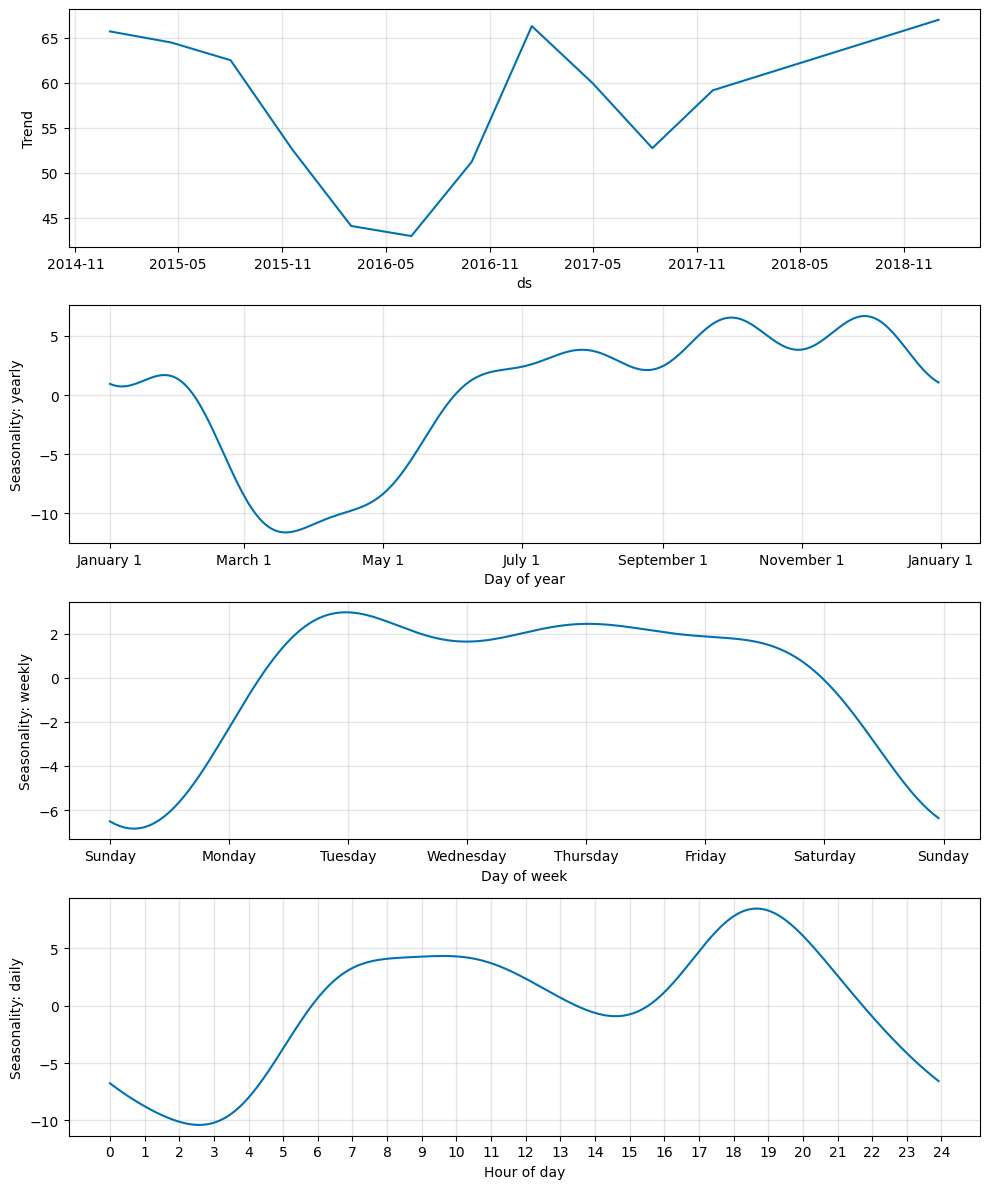

In [43]:
m.plot_parameters(components=["trend", "seasonality"])